# ADM M-R and M-Tidal Example

To run this tutorial, you should install NEoST following the install guide. 

The following block of code will properly import NEoST and its prerequisites, furthermore it also defines how to compute the mass-radius and mass-tidal deformability relations with ADM.

In [1]:
import time
import neost
from neost.eos import polytropes
from neost.Prior import Prior
from neost.Star import Star
from neost.Likelihood import Likelihood
from scipy.stats import multivariate_normal
from neost import PosteriorAnalysis
import numpy
import matplotlib
from matplotlib import pyplot
import timeit
import neost.global_imports as global_imports
from matplotlib.patches import Ellipse

start = time.time()
c = global_imports._c
G = global_imports._G
Msun = global_imports._M_s
pi = global_imports._pi
rho_ns = global_imports._rhons

In [2]:
EOS = polytropes.PolytropicEoS(crust='ceft-Hebeler', rho_t= 2e14,adm_type = 'Fermionic',dm_halo = True,two_fluid_tidal = True)

In [3]:
EOS.update({'gamma1':2.3, 'gamma2':4., 'gamma3':2.6, 'rho_t1':1.8, 'rho_t2':4, 'mchi': 4.5*pow(10,4), 'gchi_over_mphi': pow(10,-1), 'adm_fraction': 4.7, 'ceft': 2.6}, max_edsc=True)

In [4]:
central_densities = numpy.logspace(14.5,numpy.log10(EOS.max_edsc), 75)
MR = numpy.zeros((len(central_densities), 6))


#print('ADM energy density in units of g/cm^3')
for i, eps in enumerate(central_densities):
    epsdm_cent = EOS.find_epsdm_cent(EOS.adm_fraction,eps) 
    star = Star(eps,epsdm_cent)
    star.solve_structure(EOS.energydensities, EOS.pressures, EOS.energydensities_dm, EOS.pressures_dm,EOS.dm_halo, EOS.two_fluid_tidal)

    #Just to get the purely baryonic Tidal def
    star2 = Star(eps)
    star2.solve_structure(EOS.energydensities, EOS.pressures)
    MR[i] = star.Mrot, star.Req,star.tidal, star2.Mrot,star2.tidal,star.Mdm

In [5]:
end = time.time()

print("Execution time of the MR is: " + str(end-start)) 

print('ADM mass-fraction: ', MR[:,5]/MR[:,0]*100)

Execution time of the MR is: 11.475404024124146
ADM mass-fraction:  [4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7
 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7
 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7
 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7 4.7
 4.7 4.7 4.7]


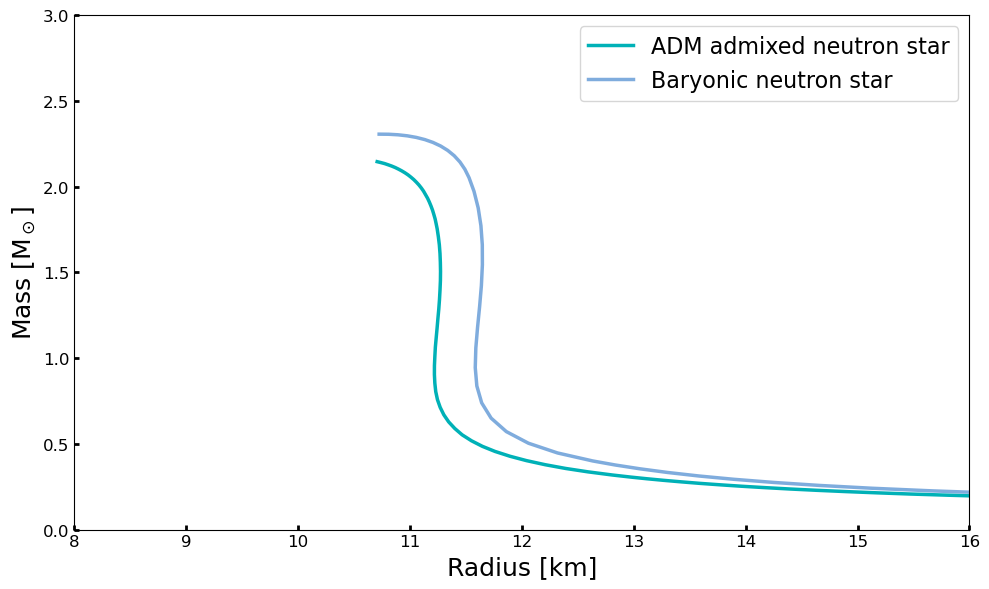

In [6]:
fig, ax = pyplot.subplots(1,1, figsize=(10, 6))
lns1 = ax.plot(MR[:,1], MR[:,0],label='ADM admixed neutron star', lw=2.5,color = '#00B1B7')
lns2 = ax.plot(EOS.massradius[:,1], EOS.massradius[:,0], label='Baryonic neutron star', lw=2.5,alpha = 0.5,color = '#005ABD')
ax.set_ylim(0.,3.)
ax.set_xlim(8,16)


ax.set_xlabel(r'Radius [km]', fontsize=18)
ax.set_ylabel(r'Mass [M$_\odot$]', fontsize=18)
ax.tick_params(width=2, labelsize=12, direction='in')
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns,labs,loc='best', fontsize=16)
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,fontsize=22)

#for axis in ['top', 'bottom', 'left', 'right']:
    #ax.spines[axis].set_linewidth(1.5)
pyplot.tight_layout()
pyplot.show()

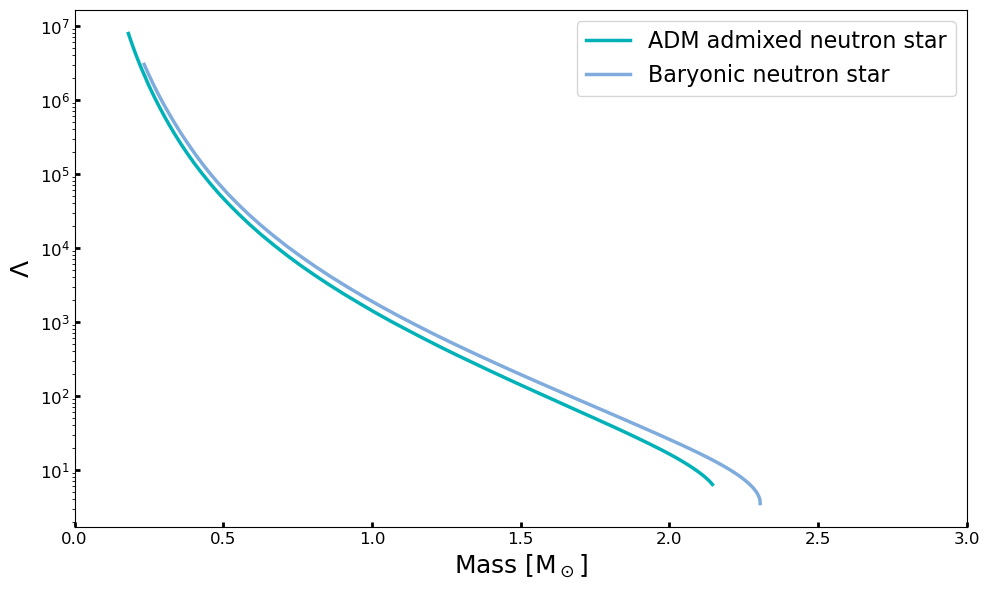

In [7]:
fig, ax = pyplot.subplots(1,1, figsize=(10, 6))
lns1 = ax.plot(MR[:,0], MR[:,2],label='ADM admixed neutron star', lw=2.5,color = '#00B1B7')
lns2 = ax.plot(MR[:,3], MR[:,4], label='Baryonic neutron star', lw=2.5,alpha = 0.5,color = '#005ABD')
ax.set_yscale('log')
ax.set_xlim(0.,3)


ax.set_ylabel(r'$\Lambda$', fontsize=18)
ax.set_xlabel(r'Mass [M$_\odot$]', fontsize=18)
ax.tick_params(width=2, labelsize=12, direction='in')
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns,labs,loc='best', fontsize=16)
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,fontsize=22)

#for axis in ['top', 'bottom', 'left', 'right']:
    #ax.spines[axis].set_linewidth(1.5)
pyplot.tight_layout()
pyplot.show()